In [22]:
from pyquil.quil import Program
from pyquil.gates import H, CNOT
from pyquil.api import QVMConnection

# Создаём объект для квантовой программы.
p = Program()

# "Мутирование" квантовой программы под действием
# "инструкции" `H(0)` - гейт Адамара, который
# действует на нулевой кубит.
p.inst(H(0))
# Добавление CNOT гейта, который использует нулевой
# кубит как управляющий, а первый кубит как таргет.
p.inst(CNOT(0, 1))

# Объект "квантовой виртуальной машины" - создаёт
# соединение с облачным бэкэндом.
qvm = QVMConnection()

# Запускаем квантовую программу `p` на бэкэнде.
result = qvm.wavefunction(p)

# Посмотреть на результаты программы в виде "{'00': p1,
# '01': p2, ...}", где p1, p2, ... - вероятности
# соответствующих исходов.
print(result.get_outcome_probs())

{'00': 0.49999999999999989, '01': 0.0, '10': 0.0, '11': 0.49999999999999989}


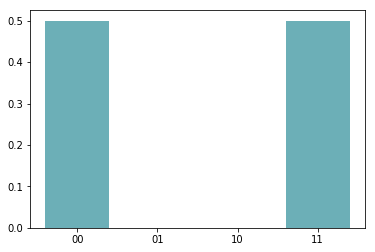

In [23]:
result.plot()

In [25]:
result.pretty_print()

'(0.71+0j)|00> + (0.71+0j)|11>'